# Final Project

## SUVs and Pedestrian Deaths

Amelia Farrell

DSC520

12/13/21

In [ ]:
# Checking directory
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/ThinkStats2/code
/content/drive/MyDrive/Colab Notebooks/ThinkStats2/code


## Loading Packages

In [ ]:
import pandas as pd
%matplotlib inline
import thinkstats2
import thinkplot
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

plt.style.use('seaborn-whitegrid')
import seaborn as sns

from scipy import stats
import patsy
import statsmodels.formula.api as smf

## Loading Data

In [ ]:
# State Data Set
# Loading data using pandas
statedf = pd.read_excel (r'FinalProjectData/pedestriandeathsbystate.xlsx')
# Read headers of data set
statedf.head()
list(statedf.columns)

['Year', 'State', 'FatalityRate', 'handhelddeviceBan', 'textingBan', 'bin']

In [ ]:
# Yearly Data Set
# Loading data using pandas
yeardf = pd.read_excel (r'FinalProjectData/pedestriandeathsbyyear.xlsx')
# Read headers of data set
yeardf.head()
list(yeardf.columns)

['Year',
 'FatalityRate',
 'Walksonly',
 'Passengercars',
 'Lighttrucks',
 'CellSubscriptions']

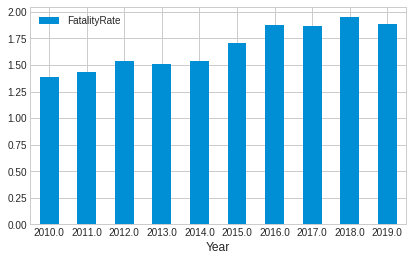

In [ ]:
yeardf.plot.bar(x='Year', y='FatalityRate', rot=0)

## Histograms

In [ ]:
import numpy
from matplotlib import pyplot

Histogram of deaths by state - 2010 through 2019

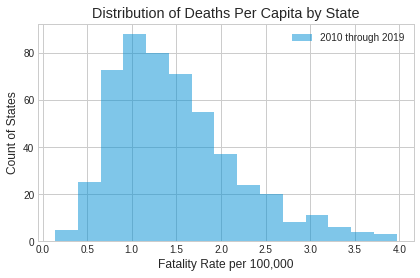

In [ ]:
# Histogram
x = statedf.FatalityRate

pyplot.hist(x, bins=15, alpha=0.5, label='2010 through 2019')
pyplot.legend(loc='upper right')
pyplot.title("Distribution of Deaths Per Capita by State")
pyplot.xlabel("Fatality Rate per 100,000")
pyplot.ylabel("Count of States")
pyplot.show()

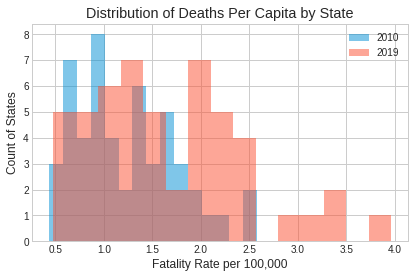

In [ ]:
# Data frame of 2010 by state
df2010 = statedf[statedf.Year==2010]
# Data frame of 2019 by state
df2019 = statedf[statedf.Year==2019]

# Histogram
x = df2010.FatalityRate
y = df2019.FatalityRate

pyplot.hist(x, bins=15, alpha=0.5, label='2010')
pyplot.hist(y, bins=15, alpha=0.5, label='2019')
pyplot.legend(loc='upper right')
pyplot.title("Distribution of Deaths Per Capita by State")
pyplot.xlabel("Fatality Rate per 100,000")
pyplot.ylabel("Count of States")
pyplot.show()

Histogram of deaths per state - Ban on Hand Held Device vs No Ban

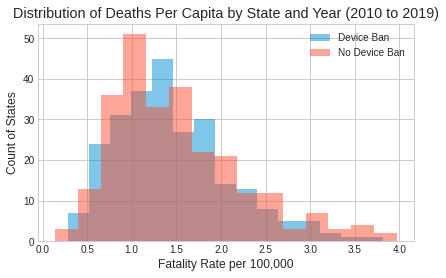

In [ ]:
# Data frame of 2010 by state
dfHHBan = statedf[statedf.handhelddeviceBan==1]
# Data frame of 2019 by state
dfNoHHBan = statedf[statedf.handhelddeviceBan==0]

# Histogram
x = dfHHBan.FatalityRate
y = dfNoHHBan.FatalityRate

pyplot.hist(x, bins=15, alpha=0.5, label='Device Ban')
pyplot.hist(y, bins=15, alpha=0.5, label='No Device Ban')
pyplot.legend(loc='upper right')
pyplot.title("Distribution of Deaths Per Capita by State and Year (2010 to 2019)")
pyplot.xlabel("Fatality Rate per 100,000")
pyplot.ylabel("Count of States")
pyplot.show()

Histogram of deaths per state - Ban on Texting vs No Ban on Texting

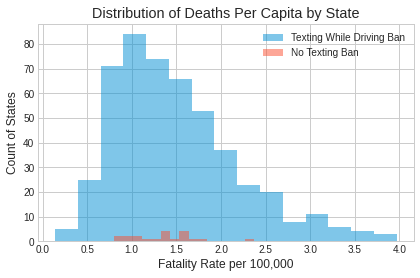

In [ ]:
# Data frame of 2010 by state
dfTxtBan = statedf[statedf.textingBan==1]
# Data frame of 2019 by state
dfNoTxtBan = statedf[statedf.textingBan==0]

# Histogram
x = dfTxtBan.FatalityRate
y = dfNoTxtBan.FatalityRate

pyplot.hist(x, bins=15, alpha=0.5, label='Texting While Driving Ban')
pyplot.hist(y, bins=15, alpha=0.5, label='No Texting Ban')
pyplot.legend(loc='upper right')
pyplot.title("Distribution of Deaths Per Capita by State")
pyplot.xlabel("Fatality Rate per 100,000")
pyplot.ylabel("Count of States")
pyplot.show()

The low number of deaths per capita in the states without a ban on texting while driving, is likey due to the small number of states that do not have this ban.

In [ ]:
# Number states with a ban on texting while driving (taking the total and deviding it by the number of years in our data set)
# Includes District of Columbia (51 "States")
(len(dfTxtBan.index))/10

49.0

In [ ]:
# Number states without a ban on texting while driving (taking the total and deviding it by the number of years in our data set)
# Includes District of Columbia (51 "States")
(len(dfNoTxtBan.index))/10

2.0

Due to the low number of states (2) we will not include the ban on texting while driving in our anaylsis.

Histogram of total deaths by year

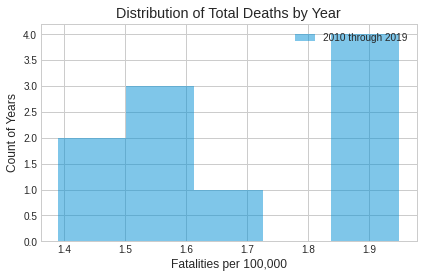

In [ ]:
# Histogram
x = yeardf.FatalityRate

pyplot.hist(x, bins=5, alpha=0.5, label='2010 through 2019')
pyplot.legend(loc='upper right')
pyplot.title("Distribution of Total Deaths by Year")
pyplot.xlabel("Fatalities per 100,000")
pyplot.ylabel("Count of Years")
pyplot.show()

We can see from the above distribution that 4 of the years are on the right side of the distribution. This is not a normal distribution and something worth investigating is going on in the years at 1.9 fatalilies.

Histogram of cell phone subscriptions by year

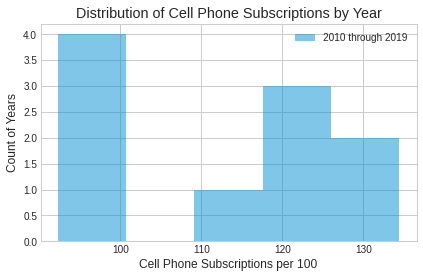

In [ ]:
# Histogram
x = yeardf.CellSubscriptions

pyplot.hist(x, bins=5, alpha=0.5, label='2010 through 2019')
pyplot.legend(loc='upper right')
pyplot.title("Distribution of Cell Phone Subscriptions by Year")
pyplot.xlabel("Cell Phone Subscriptions per 100")
pyplot.ylabel("Count of Years")
pyplot.show()

Histogram of SUVs/Light Trucks vs Passagner Car Sales & Leases by year.

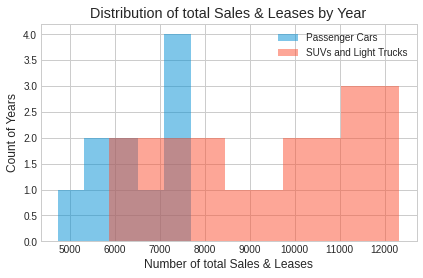

In [ ]:
# Data frame of Passenger Cars only
dfP = yeardf.Passengercars
# Data frame of SUVs and Lighttrucks only
dfLTV = yeardf.Lighttrucks

pyplot.hist(dfP, bins=5, alpha=0.5, label='Passenger Cars')
pyplot.hist(dfLTV, bins=5, alpha=0.5, label='SUVs and Light Trucks')
pyplot.legend(loc='upper right')
pyplot.title("Distribution of total Sales & Leases by Year")
pyplot.xlabel("Number of total Sales & Leases")
pyplot.ylabel("Count of Years")
pyplot.show()

We can see from these two histograms that there are far more years with high sales of SUVs ana Light Trucks. However, neither provides much insight to other patterns behind the data. We will need to use other means to identify patterns in this data set (data set #2, 10 observations =10 Years).

## Descriptive Statistics

Mean, Mode, Spread, and Tails

In [ ]:
# Removing Texting While Driving Ban variable due the the low number of observations (2)
statedf2 = statedf.drop(['textingBan','State'], axis=1)
# Means from all columns
statemean = (statedf2.mean())
yearmean = (yeardf.mean())

In [ ]:
# Standard Deviation of all columns
yearsd = (yeardf.std())
statesd = (statedf2.std())

In [ ]:
# Variance of all columns
yearvar = (yeardf.var())
statevar = (statedf2.var())

In [ ]:
# Min vaules from all columns
yearmin = (yeardf.min())
statemin = (statedf2.min())

In [ ]:
# Max vaules from all columns
yearmax = (yeardf.max())
statemax = (statedf2.max())

In [ ]:
# Data frame of discriptive statistics from data set #1 (Statedf)
stateDSdf = pd.concat([statemean, statesd, statevar, statemin, statemax], axis=1)
stateDSdf.columns = ['Mean', 'Std','Variance','Min','Max']
stateDSdf = stateDSdf.astype('int64')#.round()
#stateDSdf.apply(pd.to_numeric)
stateDSdf

,Mean,Std,Variance,Min,Max
Year,2014,2,8,2010,2019
FatalityRate,1,0,0,0,3
handhelddeviceBan,0,0,0,0,1
bin,1,0,0,1,4


In [ ]:
# Data frame of discriptive statistics from data set #2 (Yeardf)
yearDSdf = pd.concat([yearmean, yearsd, yearvar, yearmin, yearmax], axis=1)
yearDSdf.columns =['Mean', 'Std','Variance','Min','Max']
yearDSdf

,Mean,Std,Variance,Min,Max
Year,2014.500000,3.027650,9.166667e+00,2010.000000,2019.000000
FatalityRate,1.671000,0.212888,4.532111e-02,1.390000,1.950000
Walksonly,4010.006000,106.153256,1.126851e+04,3797.048000,4153.050000
Passengercars,6495.117700,1041.556567,1.084840e+06,4733.128000,7694.797000
Lighttrucks,9265.134900,2283.297292,5.213447e+06,5865.251000,12325.764000
CellSubscriptions,112.279551,15.475095,2.394786e+02,92.267771,134.458879


## CDF

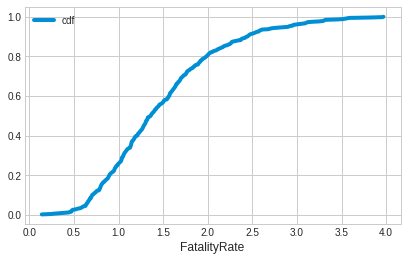

In [ ]:
# Defining the data we would like to use
# We will be looking at the CDF of falality rate by year and state
s = statedf[["FatalityRate"]]
df = pd.DataFrame(s)
# Get the frequency, PDF and CDF for each value in the series

# Frequency
stats_df = df \
.groupby('FatalityRate') \
['FatalityRate'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'FatalityRate': 'frequency'})

# PDF
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# CDF
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
stats_df

stats_df.plot(x = 'FatalityRate', y = ['cdf'], grid = True)

## PMF

Since our sample data set has many vaules, creating a simple PMF would lead to issus and far too much noise. We need to bin our data (dividing the data in range of non-overlapping values) before creating a clean PMF. In order to do this we rounded our data points to the nearst whole number, essentily "binning" the Fatality Rates into finite groups of whole numbers. We are also intrested in the change in Fatality probaility from 2010 to 2019 so we will be creating a PMF of both years.

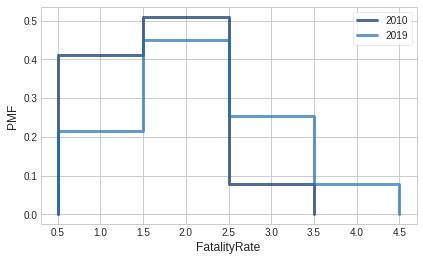

In [ ]:
# Data for 2010
new2010df = statedf[(statedf.Year == 2010)]
s1 = new2010df[["bin"]]

# Data for 2019
new2019df = statedf[(statedf.Year == 2019)]
s2 = new2019df[["bin"]]

# PMF using thinkstats2.Pmf function
pmf1 = thinkstats2.Pmf(s1.bin, label='2010')
pmf2 = thinkstats2.Pmf(s2.bin, label='2019')

# PMF plot of actual distribution
thinkplot.Pmf(pmf1)
thinkplot.Pmf(pmf2)
thinkplot.Config(xlabel='FatalityRate', ylabel='PMF')


## Analytical Distribution - Pareto

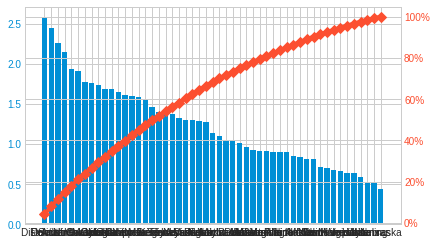

In [ ]:
sdrop = statedf.drop(['handhelddeviceBan','textingBan','bin'], axis=1)
Paretodf = sdrop[(sdrop.Year == 2010)]
Paretodf.index = Paretodf['State']
Paretodf = Paretodf.sort_values(by='FatalityRate',ascending=False)
Paretodf["cumpercentage"] = Paretodf["FatalityRate"].cumsum()/Paretodf["FatalityRate"].sum()*100


fig, ax = plt.subplots()
ax.bar(Paretodf.index, Paretodf["FatalityRate"], color="C0")
ax2 = ax.twinx()
ax2.plot(Paretodf.index, Paretodf["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()


## Scatter Plots

In [ ]:
yeardf

,Year,FatalityRate,Walksonly,Passengercars,Lighttrucks,CellSubscriptions
0,2010.0,1.39,3797.048,5723.862,5865.251,92.267771
1,2011.0,1.43,3887.969,6128.019,6649.786,95.449046
2,2012.0,1.54,3969.058,7245.040,7249.427,97.068599
3,2013.0,1.51,4000.459,7582.598,8009.802,98.197684
4,2014.0,1.54,4011.094,7694.797,8821.096,111.556216
5,2015.0,1.71,4114.125,7531.958,9940.279,119.143921
6,2016.0,1.88,4086.487,6882.104,10677.107,122.594548
7,2017.0,1.87,4054.632,6103.842,11127.028,123.044834
8,2018.0,1.95,4026.138,5325.829,11985.809,129.014007
9,2019.0,1.89,4153.050,4733.128,12325.764,134.458879


In [ ]:
# Pearson's r for Cell Subscriptions
x=yeardf["CellSubscriptions"]
y=yeardf["FatalityRate"]
x.corr(y)

0.9485991407249945

In [ ]:
# Pearson's r for SUV & Lighttruck Sales
x=yeardf["Lighttrucks"]
y=yeardf["FatalityRate"]
x.corr(y)

0.967204460064907

Text(0, 0.5, 'Fatality Rate')

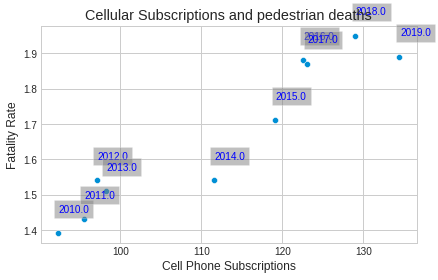

In [ ]:
# Scatter Plot for number of cell phone subscriptions per capita and pedestrian deaths by year
sns.scatterplot(data=yeardf,x='CellSubscriptions',y='FatalityRate')
for i in range(yeardf.shape[0]):
 plt.text(x=yeardf.CellSubscriptions[i]+0.06,y=yeardf.FatalityRate[i]+0.06,s=yeardf.Year[i], 
          fontdict=dict(color='blue',size=10),
          bbox=dict(facecolor='grey',alpha=0.5))

plt.title('Cellular Subscriptions and pedestrian deaths') #title
plt.xlabel('Cell Phone Subscriptions') #x label
plt.ylabel('Fatality Rate') #y label

Text(0, 0.5, 'Fatality Rate')

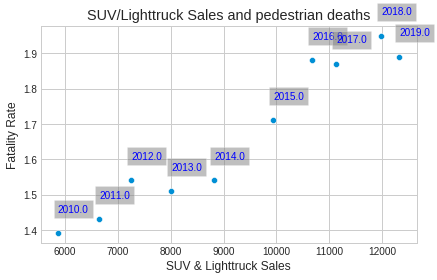

In [ ]:
# Scatter Plot for number of cell phone subscriptions per capita and pedestrian deaths by year
sns.scatterplot(data=yeardf,x='Lighttrucks',y='FatalityRate')
for i in range(yeardf.shape[0]):
 plt.text(x=yeardf.Lighttrucks[i]+0.06,y=yeardf.FatalityRate[i]+0.06,s=yeardf.Year[i], 
          fontdict=dict(color='blue',size=10),
          bbox=dict(facecolor='grey',alpha=0.5))

plt.title('SUV/Lighttruck Sales and pedestrian deaths') #title
plt.xlabel('SUV & Lighttruck Sales') #x label
plt.ylabel('Fatality Rate') #y label

## Hypothesis Testing - Welch’s t-test
Welch’s t-test univariate test that tests for a significant difference between the mean of two unrelated groups. It is an alternative to the independent t-test when there are unequal variances.

In [ ]:
# Data frame of SUVs and Lighttrucks only
Lighttrucksbyyear = yeardf["Lighttrucks"]
# Data frame of Fatality per 100,000
totalfatalitybyyear = yeardf["FatalityRate"]
# Test for equal variances. We want to look for a difference less than 4
print((np.var(Lighttrucksbyyear))/(np.var(totalfatalitybyyear)))
# Since we got a value over 4 we will continue with Welch’s t-test
# testing the assumption of normality using the stats.shapiro()
# first value in the tuple is the W test statistic, and the second value is the p-value.
print((stats.shapiro(Lighttrucksbyyear)), (stats.shapiro(totalfatalitybyyear)))
# Welch’s t-test
stats.ttest_ind(Lighttrucksbyyear, totalfatalitybyyear, equal_var = False)
# Since out p-value is significant (less than 0.5), we can reject the null hypothesis and say that there is a signifange difference in means. Meaning that the increase in deaths may not be related to the increase in lighttrucks and suvs.


115033510.75980507
(0.9468666911125183, 0.6316025853157043) (0.8803905248641968, 0.1318477839231491)


Ttest_indResult(statistic=12.82953600693544, pvalue=4.3486425439362615e-07)

## Regression Analysis - Linear Regression

In [ ]:
# Cacluate R-Squared to find the best fit variables for our regression model.
# We want to chose the variables with the 
# R-Squared for Lighttrucks
y_values = yeardf["Lighttrucks"]
x_values = yeardf["FatalityRate"]

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

# R-Squared for Lighttrucks
p_values = yeardf["Passengercars"]

pcorrelation_matrix = np.corrcoef(x_values, p_values)
pcorrelation_xy = pcorrelation_matrix[0,1]
pr_squared = pcorrelation_xy**2

# R-Squared for CellSubscriptions
c_values = yeardf["CellSubscriptions"]

ccorrelation_matrix = np.corrcoef(x_values, c_values)
ccorrelation_xy = ccorrelation_matrix[0,1]
cr_squared = ccorrelation_xy**2


print("Lighttrucks:",r_squared,"Passengercars:",pr_squared,"CellSubscriptions:",cr_squared)

Lighttrucks: 0.9354844675694485 Passengercars: 0.15828037876697454 CellSubscriptions: 0.8998403297841981


In [ ]:
# Linear regession model using only Lighttrucks
model = smf.ols('FatalityRate ~ Lighttrucks', data=yeardf)
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FatalityRate   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     116.0
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           4.86e-06
Time:                        23:07:24   Log-Likelihood:                 15.512
No. Observations:                  10   AIC:                            -27.02
Df Residuals:                       8   BIC:                            -26.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8355      0.080     10.487      0.000       0.652       1.019
Lighttrucks  9.018e-05   8.37e-06     10.770      0.000    7.09e-05       0.000
==============================================================================
Omnibus:                        0.449   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.799   Jarque-Bera (JB):                0.501
Skew:                          -0.220   Prob(JB):                        0.779
Kurtosis:                       1.996   Cond. No.                     4.18e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Linear regession model using Lighttrucks and CellSubscriptions
import patsy
import statsmodels.formula.api as smf
model = smf.ols('FatalityRate ~ Lighttrucks+CellSubscriptions', data=yeardf)
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FatalityRate   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     51.34
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           6.57e-05
Time:                        23:07:27   Log-Likelihood:                 15.566
No. Observations:                  10   AIC:                            -25.13
Df Residuals:                       7   BIC:                            -24.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.9431      0.398      2.369      0.050       0.002       1.885
Lighttrucks           0.0001   5.23e-05      1.997      0.086   -1.93e-05       0.000
CellSubscriptions    -0.0021      0.008     -0.277      0.790      -0.020       0.016
==============================================================================
Omnibus:                        0.500   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.779   Jarque-Bera (JB):                0.514
Skew:                          -0.184   Prob(JB):                        0.773
Kurtosis:                       1.952   Cond. No.                     1.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Testing our choosen model (simple linear regression useing lighttrucks only)

Coefficients:  [[9.43039674e-05]]
Variance score: 0.8128251876656488


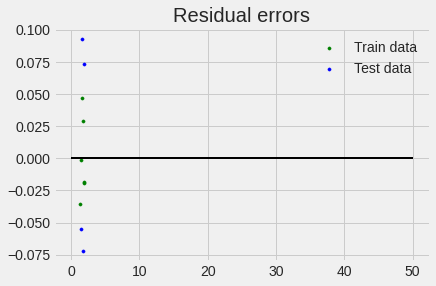

In [ ]:
# Defining feature matrix(X) and response variable FatalityRate
X = yeardf[['Lighttrucks']]
y = yeardf[["FatalityRate"]]
 
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)
 
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()